## Value Investor

In [1]:
#Import the libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA 
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

In [2]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
russia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Russia - Sberbank Rossii PAO (S', parse_dates = True)
# Display the columns
russia.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,291.02,294,294.42,290.26,47.00M,-0.0076
1,2021-03-30 00:00:00,293.25,294.86,295.72,291.5,38.81M,-0.0002
2,2021-03-29 00:00:00,293.3,289.72,294.09,289.26,43.68M,0.0071
3,2021-03-26 00:00:00,291.22,288.63,292.75,288.32,56.07M,0.0159
4,2021-03-25 00:00:00,286.66,286.5,287.03,283.85,35.22M,0.0030


In [3]:
russia.shape

(312, 7)

In [4]:
russia.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [5]:
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      312 non-null    object 
 1   Price     312 non-null    object 
 2   Open      312 non-null    object 
 3   High      312 non-null    object 
 4   Low       312 non-null    object 
 5   Vol.      311 non-null    object 
 6   Change %  311 non-null    float64
dtypes: float64(1), object(6)
memory usage: 17.2+ KB


In [6]:
#Check index type
russia.index.dtype

dtype('int64')

In [7]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
turkey=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Turkey - Koc Holding AS (KCHOL)', parse_dates = True)
# Display the columns
turkey.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,19.41,19.42,19.63,19.27,13.14M,-0.0046
1,2021-03-30 00:00:00,19.5,19.12,19.81,19.03,21.05M,0.0209
2,2021-03-29 00:00:00,19.1,19.24,19.67,19.1,16.56M,-0.0078
3,2021-03-26 00:00:00,19.25,20.28,20.36,19.1,21.35M,-0.0385
4,2021-03-25 00:00:00,20.02,20.5,20.86,20.02,15.93M,-0.0148


In [8]:
turkey.shape

(316, 7)

In [9]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
egypt=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Egypt - Medinet Nasr Housing (M', parse_dates = True)
# Display the columns
egypt.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,3.75,3.74,3.82,3.71,1.57M,0.0054
1,2021-03-30 00:00:00,3.73,3.71,3.76,3.67,3.43M,0.0081
2,2021-03-29 00:00:00,3.7,3.69,3.73,3.68,1.25M,-0.0027
3,2021-03-28 00:00:00,3.71,3.76,3.76,3.68,2.34M,0.0000
4,2021-03-25 00:00:00,3.71,3.62,3.78,3.59,2.50M,0.0137


In [10]:
egypt.shape

(306, 7)

In [11]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
brazil=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Brazil - Minerva SABrazil (BEEF', parse_dates = True)
# Display the columns
brazil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,10.2,10.35,10.4,10.12,7.77M,-0.0154
1,2021-03-30 00:00:00,10.36,10.41,10.62,10.3,9.93M,-0.0105
2,2021-03-29 00:00:00,10.47,9.85,10.5,9.81,22.04M,0.0651
3,2021-03-26 00:00:00,9.83,9.8,9.94,9.7,5.11M,0.0031
4,2021-03-25 00:00:00,9.8,10.01,10.01,9.66,8.88M,-0.0151


In [12]:
brazil.shape

(310, 7)

In [13]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
argentina=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Argentina - Pampa Energia SA (P', parse_dates = True)
# Display the columns
argentina.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,85.15,86.5,88.1,85.15,564.30K,-0.0110
1,2021-03-30 00:00:00,86.1,85.15,86.75,84.6,141.40K,0.0129
2,2021-03-29 00:00:00,85,80,86,79,371.22K,0.0385
3,2021-03-26 00:00:00,81.85,84,84.6,80.7,462.55K,-0.0209
4,2021-03-25 00:00:00,83.6,85.2,87.3,82.1,389.78K,-0.0313


In [14]:
argentina.shape

(301, 7)

In [15]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
colombia=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='Colombia - Cementos Argos SA (C', parse_dates = True)
# Display the columns
colombia.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,5150,5100,5170,5100,212.44K,0.0098
1,2021-03-30 00:00:00,5100,5010,5100,5010,583.70K,0.0109
2,2021-03-29 00:00:00,5045,5020,5045,5015,117.54K,0.0050
3,2021-03-26 00:00:00,5020,5085,5085,4980,203.46K,-0.0020
4,2021-03-25 00:00:00,5030,5035,5045,4950,317.06K,0.0010


In [16]:
colombia.shape

(304, 7)

In [17]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
safrica=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Africa - Impala Platinum ', parse_dates = True)
# Display the columns
safrica.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,27373,26980,27526,26657,2.49M,0.0177
1,2021-03-30 00:00:00,26898,26766,27443,26360,3.02M,-0.0030
2,2021-03-29 00:00:00,26980,27800,28174,26614,4.44M,-0.0201
3,2021-03-26 00:00:00,27533,27083,28006,26728,3.36M,0.0365
4,2021-03-25 00:00:00,26564,25954,27128,25954,2.83M,0.0255


In [18]:
safrica.shape

(315, 7)

In [19]:
# Getting the data, pandas will attempt to infer the format of the datetime strings in the columns.
skorea=pd.read_excel('2020Q1Q2Q3Q4-2021Q1.xlsx', sheet_name='South Korea - Dongkuk Steel Mil', parse_dates = True)
# Display the columns
skorea.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-03-31 00:00:00,13650,13700,13750,13450,0.19K,0.0000
1,2021-03-30 00:00:00,13650,13850,14200,13050,3.17M,0.0074
2,2021-03-29 00:00:00,13550,12500,13800,12500,0.20K,0.1107
3,2021-03-28 00:00:00,12200,12200,12200,12200,-,0.0000
4,2021-03-26 00:00:00,12200,11500,12300,11350,2.34M,0.0796


In [20]:
skorea.shape

(342, 7)

##### Data Exploration

In [21]:
#Sort dataframes by date but first convert date to datetime
# Convert the 'Date' column to datetime
russia['Date'] = pd.to_datetime(russia['Date'], errors='coerce')
russia['Price'] = pd.to_numeric(russia['Price'], errors='coerce')
# Drop rows where the 'Date' & 'Price' conversion failed
russia = russia.dropna(subset=['Date'])
russia = russia.dropna(subset=['Price'])
# Sort the DataFrame by the 'Date' column
russia=russia.sort_values('Date')
# Reset the index
russia = russia.reset_index(drop=True)
russia.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.0010
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.0043
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,0.0207
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.0045
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.0008


In [22]:
#Do the same for all dataframes
turkey['Date'] = pd.to_datetime(turkey['Date'], errors='coerce')
turkey['Price'] = pd.to_numeric(turkey['Price'], errors='coerce')
turkey = turkey.dropna(subset=['Date'])
turkey = turkey.dropna(subset=['Price'])
turkey = turkey.sort_values('Date')
turkey = turkey.reset_index(drop=True)
turkey.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,20.38,20.42,20.44,20.24,2.53M,0.0030
1,2020-01-03,20.30,20.3,20.44,19.97,3.31M,-0.0039
2,2020-01-06,20.08,20.34,20.34,19.97,1.94M,-0.0108
3,2020-01-07,19.93,20.22,20.28,19.92,2.89M,-0.0075
4,2020-01-08,19.94,19.89,19.95,19.66,2.79M,0.0005


In [23]:
#Do the same for all dataframes
egypt['Date'] = pd.to_datetime(egypt['Date'], errors='coerce')
egypt['Price'] = pd.to_numeric(egypt['Price'], errors='coerce')
egypt = egypt.dropna(subset=['Date'])
egypt = egypt.dropna(subset=['Price'])
egypt = egypt.sort_values('Date')
egypt = egypt.reset_index(drop=True)
egypt.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,4.81,4.81,4.87,4.78,241.60K,-0.0021
1,2020-01-05,4.41,4.7,4.7,4.33,3.76M,-0.0832
2,2020-01-06,4.28,4.16,4.44,4.12,2.52M,-0.0295
3,2020-01-08,4.41,4.19,4.59,4.15,3.52M,0.0304
4,2020-01-09,4.62,4.55,4.7,4.55,2.09M,0.0476


In [24]:
#Do the same for all dataframes
brazil['Date'] = pd.to_datetime(brazil['Date'], errors='coerce')
brazil['Price'] = pd.to_numeric(brazil['Price'], errors='coerce')
brazil = brazil.dropna(subset=['Date'])
brazil = brazil.dropna(subset=['Price'])
brazil = brazil.sort_values('Date')
brazil = brazil.reset_index(drop=True)
brazil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,12.57,12.88,12.99,12.57,5.78M,-0.0210
1,2020-01-03,12.90,12.45,12.93,12.27,4.88M,0.0263
2,2020-01-06,12.89,12.9,12.91,12.57,4.17M,-0.0008
3,2020-01-07,13.48,13.03,13.48,13.03,8.20M,0.0458
4,2020-01-08,13.63,13.5,13.68,13.18,6.18M,0.0111


In [25]:
#Do the same for all dataframes
argentina['Date'] = pd.to_datetime(argentina['Date'], errors='coerce')
argentina['Price'] = pd.to_numeric(argentina['Price'], errors='coerce')
argentina = argentina.dropna(subset=['Date'])
argentina = argentina.dropna(subset=['Price'])
argentina = argentina.sort_values('Date')
argentina = argentina.reset_index(drop=True)
argentina.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.2,47.55,878.50K,-0.0292
1,2020-01-03,48.80,48.25,49.45,46.5,595.36K,0.0114
2,2020-01-06,48.50,48.4,48.7,47,719.24K,-0.0061
3,2020-01-07,47.60,48.35,49,46.9,901.95K,-0.0186
4,2020-01-08,46.50,47.5,47.5,46,1.18M,-0.0231


In [26]:
#Do the same for all dataframes
colombia['Date'] = pd.to_datetime(colombia['Date'], errors='coerce')
colombia['Price'] = pd.to_numeric(colombia['Date'], errors='coerce')
colombia = colombia.dropna(subset=['Date'])
colombia = colombia.dropna(subset=['Price'])
colombia = colombia.sort_values('Date')
colombia = colombia.reset_index(drop=True)
colombia.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,1577923200000000000,7300,7300,7120,138.96K,-0.0247
1,2020-01-03,1578009600000000000,7040,7100,6960,470.77K,-0.0169
2,2020-01-07,1578355200000000000,6950,6950,6850,168.71K,-0.0071
3,2020-01-08,1578441600000000000,6940,6950,6880,84.93K,-0.0101
4,2020-01-09,1578528000000000000,6880,6890,6800,262.89K,-0.0102


In [27]:
#Do the same for all dataframes
safrica['Date'] = pd.to_datetime(safrica['Date'], errors='coerce')
safrica['Price'] = pd.to_numeric(safrica['Date'], errors='coerce')
safrica = safrica.dropna(subset=['Date'])
safrica = safrica.dropna(subset=['Price'])
safrica = safrica.sort_values('Date')
safrica = safrica.reset_index(drop=True)
safrica.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,1577923200000000000,14525,14764,14325,2.01M,-0.0015
1,2020-01-03,1578009600000000000,14700,14884,14360,3.19M,0.0358
2,2020-01-06,1578268800000000000,14985,15045,14574,2.61M,-0.0150
3,2020-01-07,1578355200000000000,14688,14688,13940,3.94M,-0.0082
4,2020-01-08,1578441600000000000,14775,15465,14468,6.24M,0.0545


In [28]:
#Do the same for all dataframes
skorea['Date'] = pd.to_datetime(skorea['Date'], errors='coerce')
skorea['Price'] = pd.to_numeric(skorea['Date'], errors='coerce')
skorea = skorea.dropna(subset=['Date'])
skorea = skorea.dropna(subset=['Price'])
skorea = skorea.sort_values('Date')
skorea = skorea.reset_index(drop=True)
skorea.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,1577923200000000000,5930,5980,5820,239.90K,-0.0168
1,2020-01-03,1578009600000000000,5870,5920,5830,230.40K,0.0085
2,2020-01-06,1578268800000000000,5890,5890,5680,319.88K,-0.0288
3,2020-01-07,1578355200000000000,5740,5770,5650,303.89K,-0.0070
4,2020-01-08,1578441600000000000,5640,5640,5390,524.10K,-0.0457


##### Data Visualization

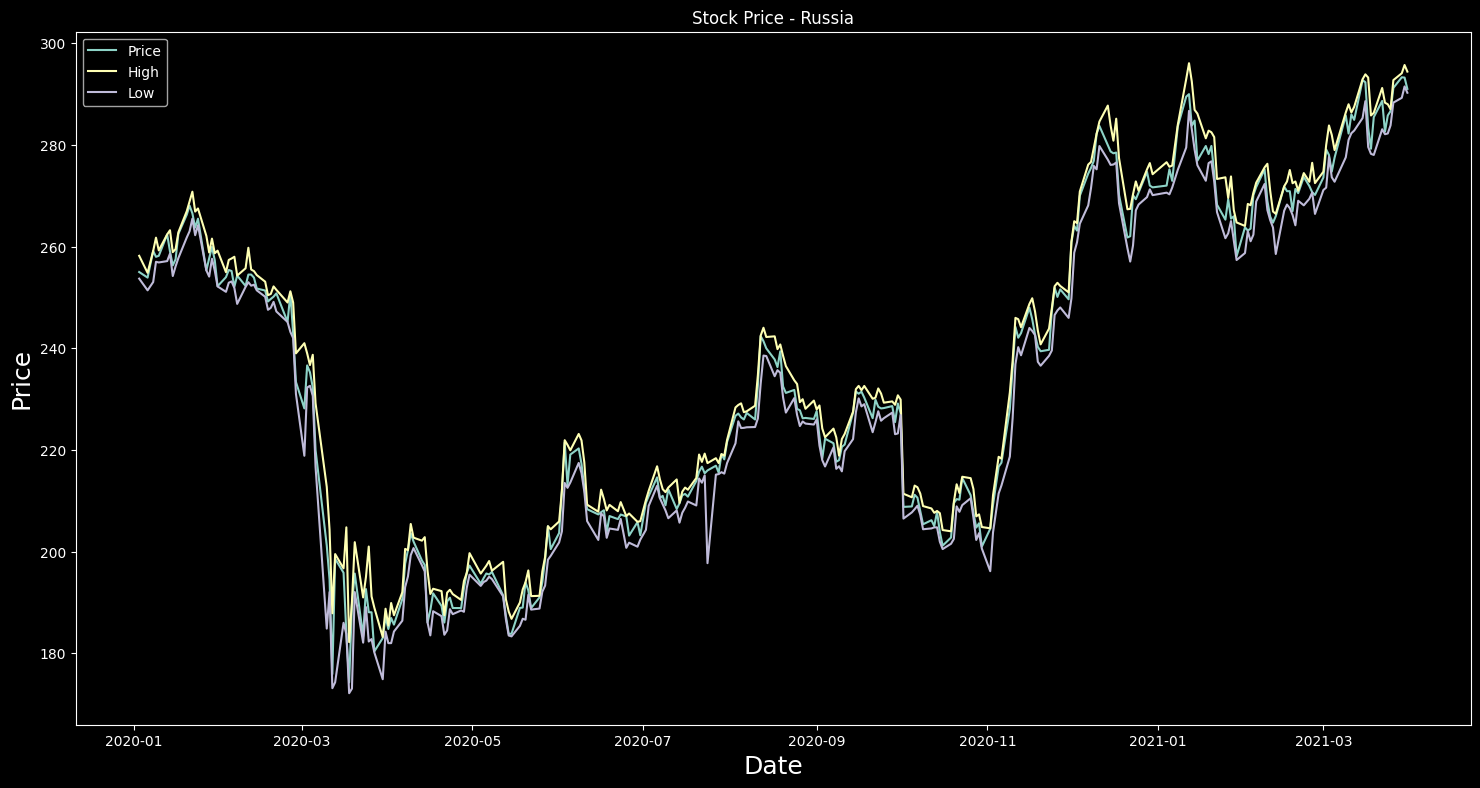

In [29]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(russia['Date'], russia['Price'], label='Price')
plt.plot(russia['Date'], russia['High'], label='High')
plt.plot(russia['Date'], russia['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Russia')

# Show the legend
plt.legend()

# Display the plot
plt.show()

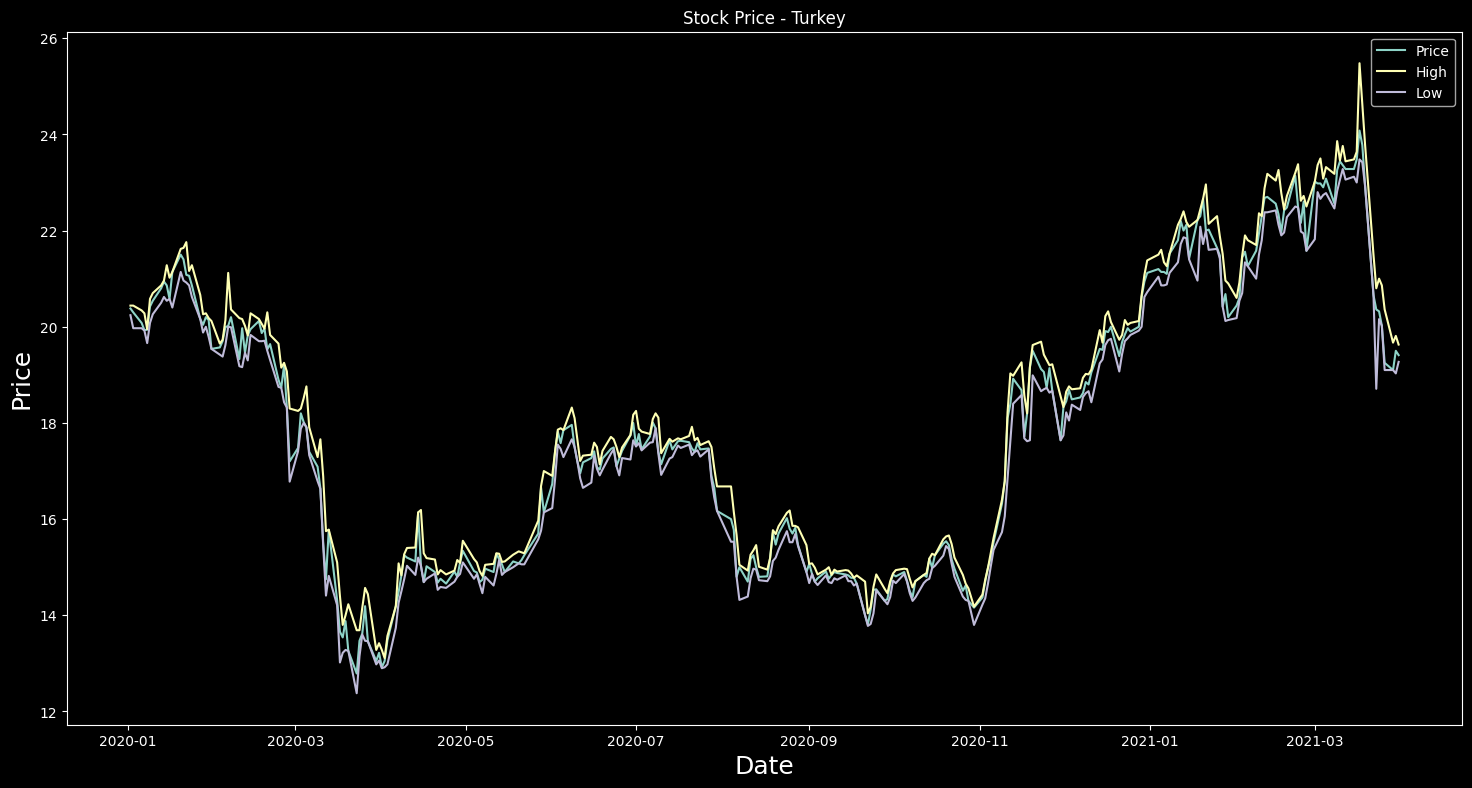

In [30]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(turkey['Date'], turkey['Price'], label='Price')
plt.plot(turkey['Date'], turkey['High'], label='High')
plt.plot(turkey['Date'], turkey['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Turkey')

# Show the legend
plt.legend()

# Display the plot
plt.show()

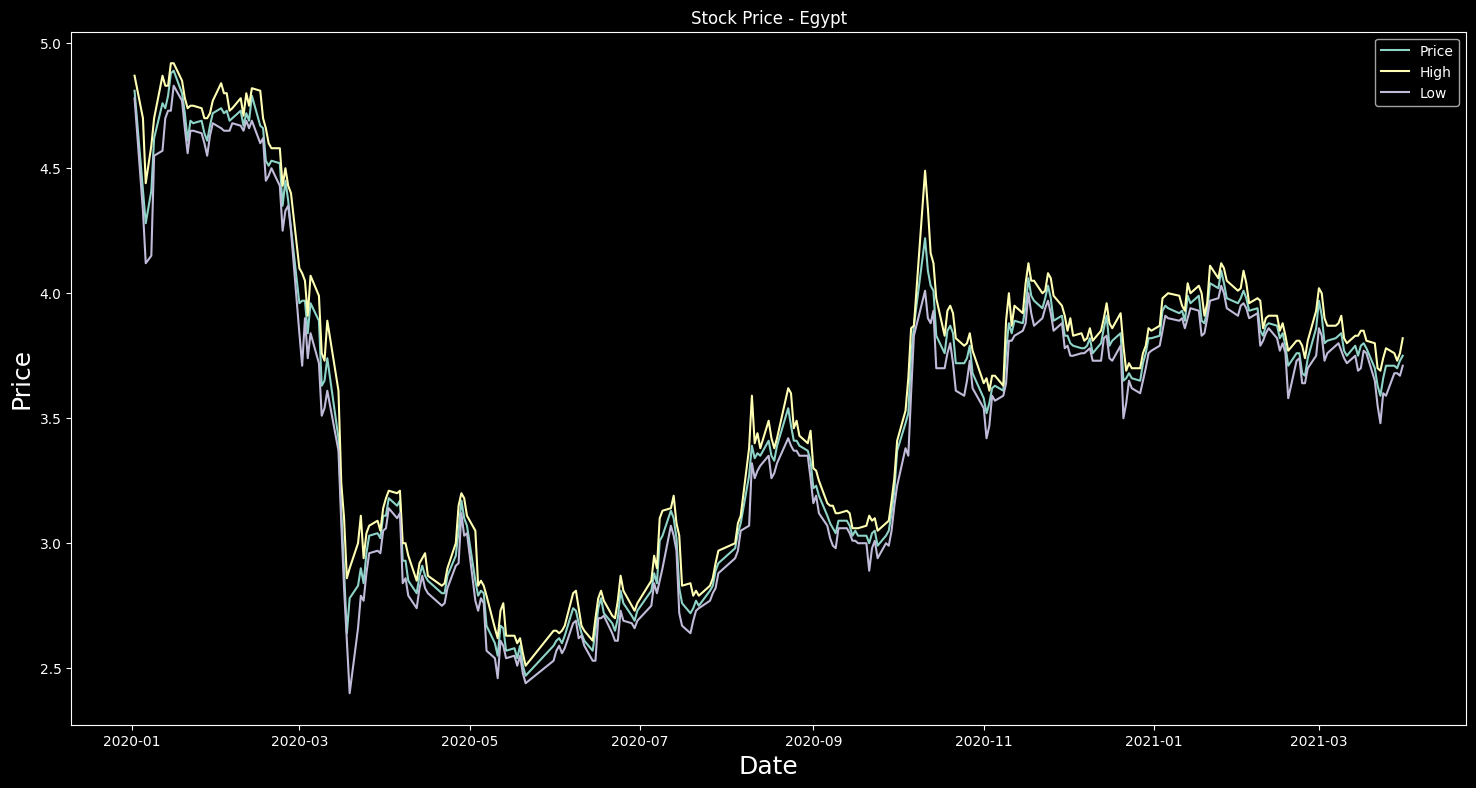

In [31]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(egypt['Date'], egypt['Price'], label='Price')
plt.plot(egypt['Date'], egypt['High'], label='High')
plt.plot(egypt['Date'], egypt['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Egypt')

# Show the legend
plt.legend()

# Display the plot
plt.show()

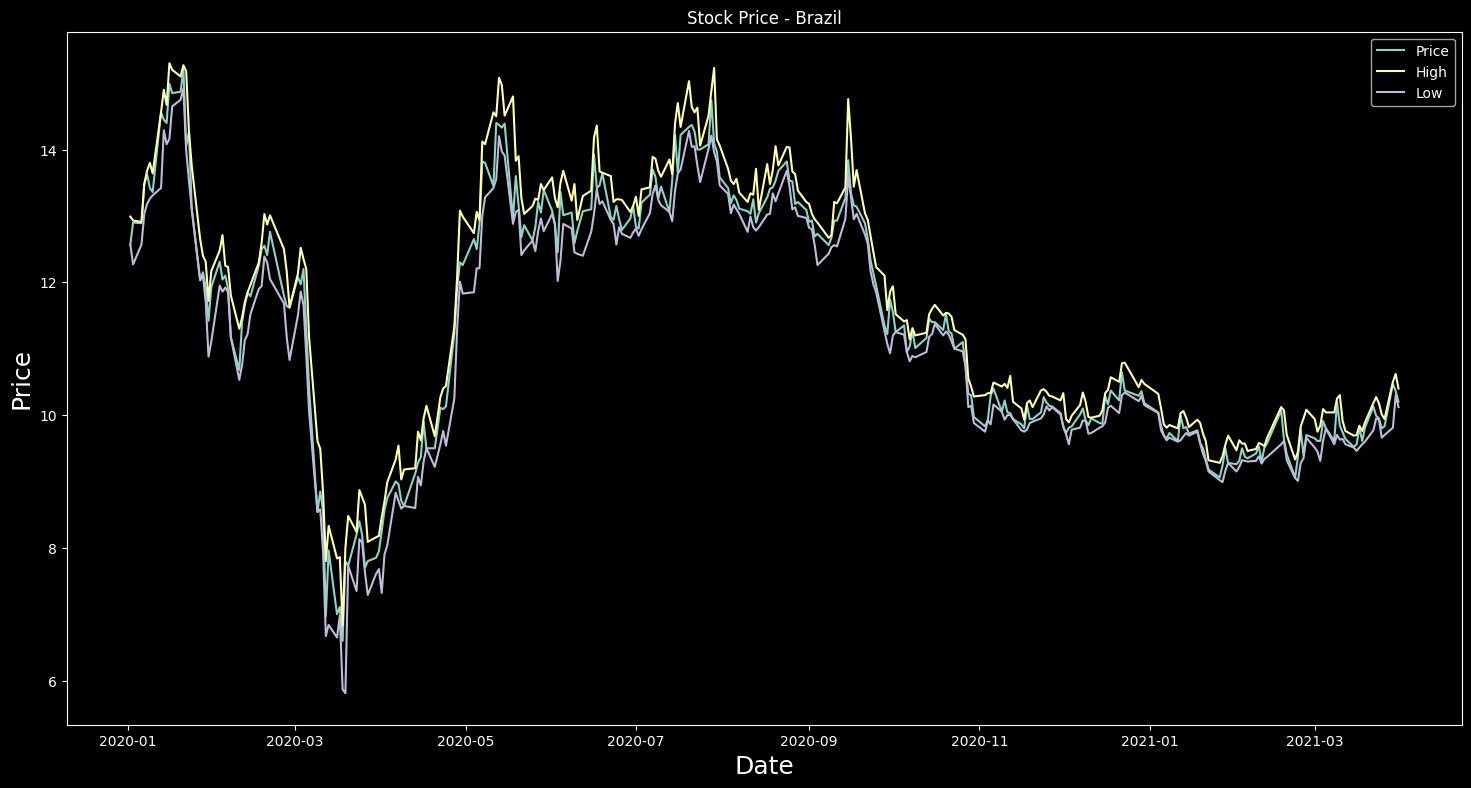

In [32]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(brazil['Date'], brazil['Price'], label='Price')
plt.plot(brazil['Date'], brazil['High'], label='High')
plt.plot(brazil['Date'], brazil['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Brazil')

# Show the legend
plt.legend()

# Display the plot
plt.show()

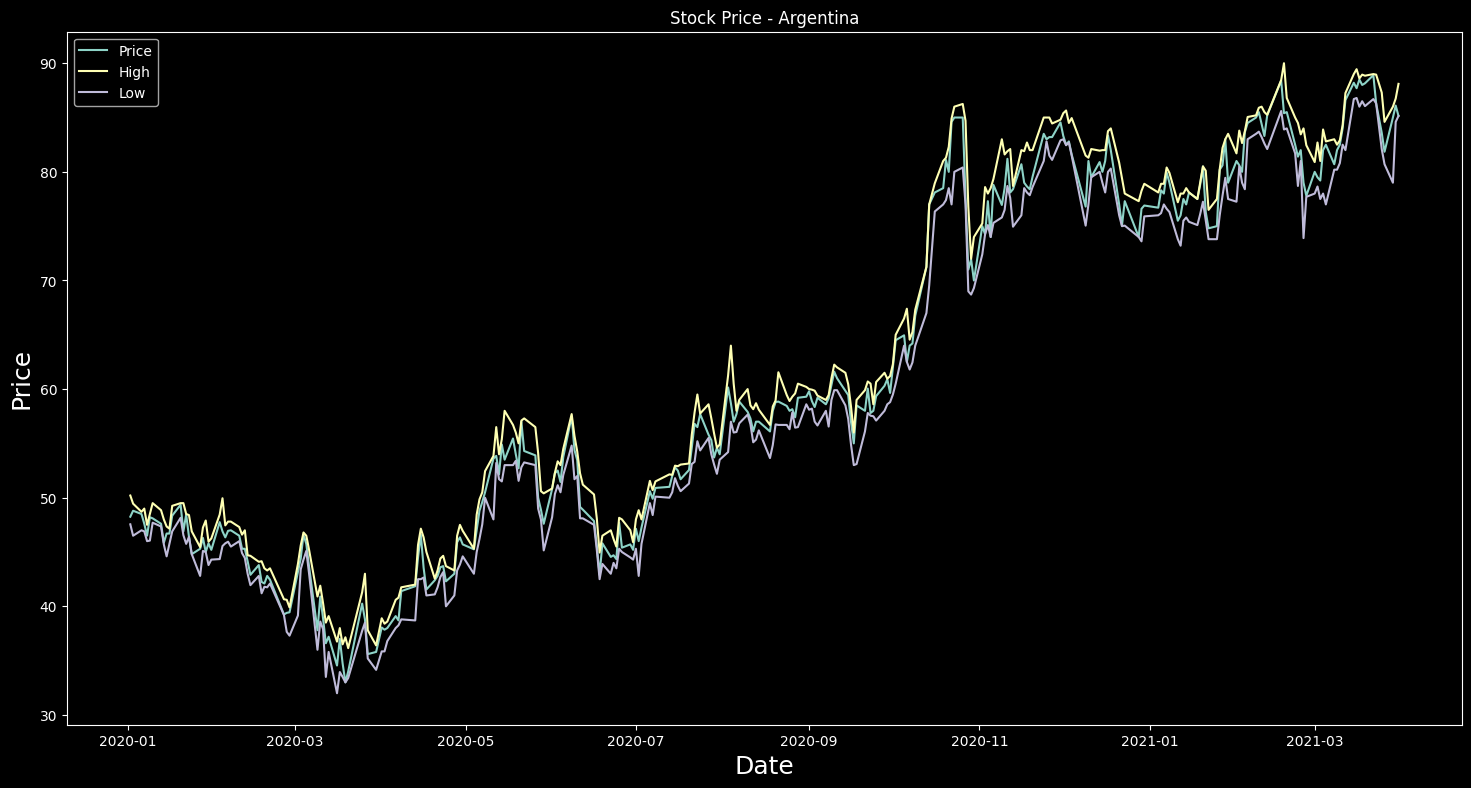

In [33]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(argentina['Date'], argentina['Price'], label='Price')
plt.plot(argentina['Date'], argentina['High'], label='High')
plt.plot(argentina['Date'], argentina['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Argentina')

# Show the legend
plt.legend()

# Display the plot
plt.show()

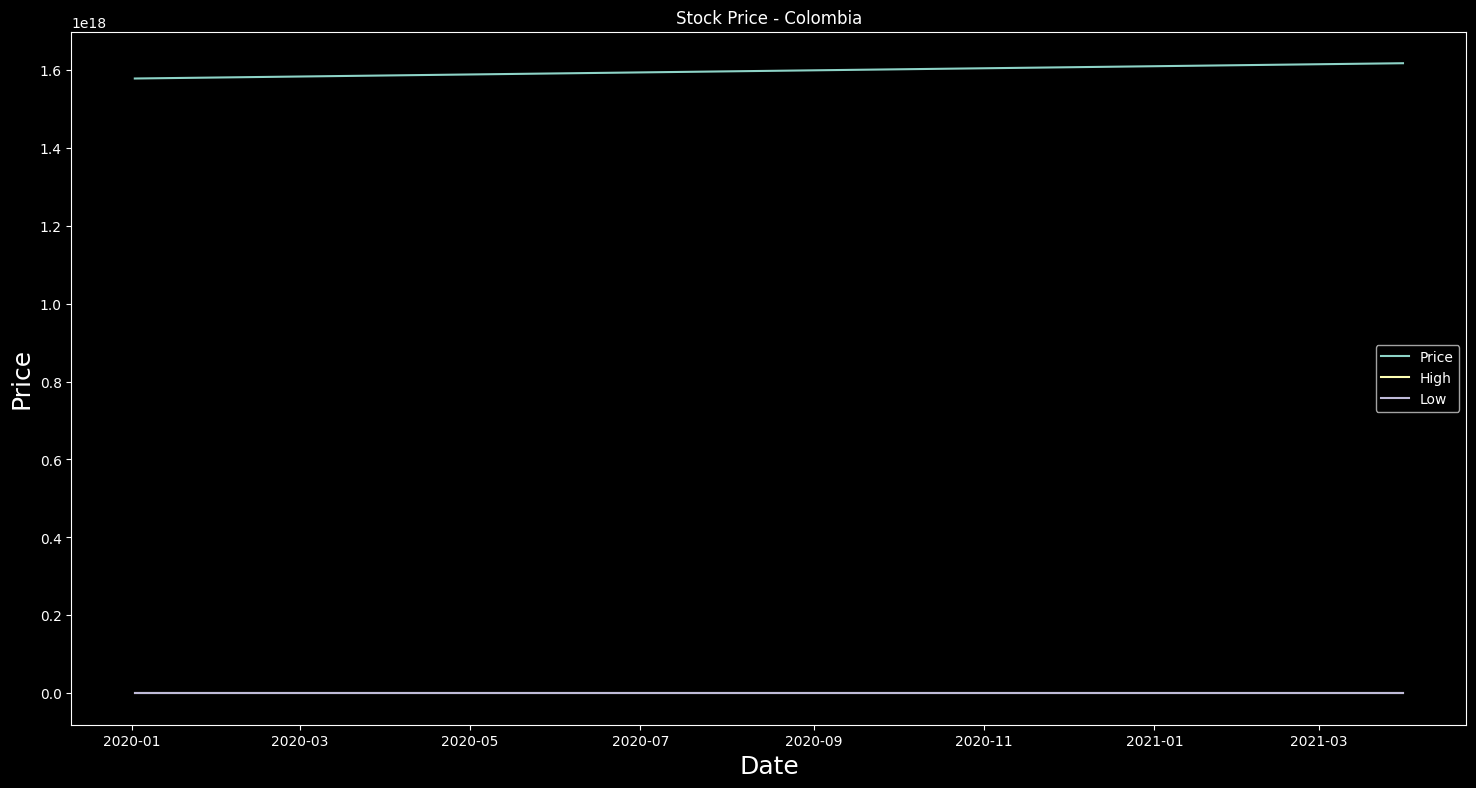

In [34]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(colombia['Date'], colombia['Price'], label='Price')
plt.plot(colombia['Date'], colombia['High'], label='High')
plt.plot(colombia['Date'], colombia['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - Colombia')

# Show the legend
plt.legend()

# Display the plot
plt.show()

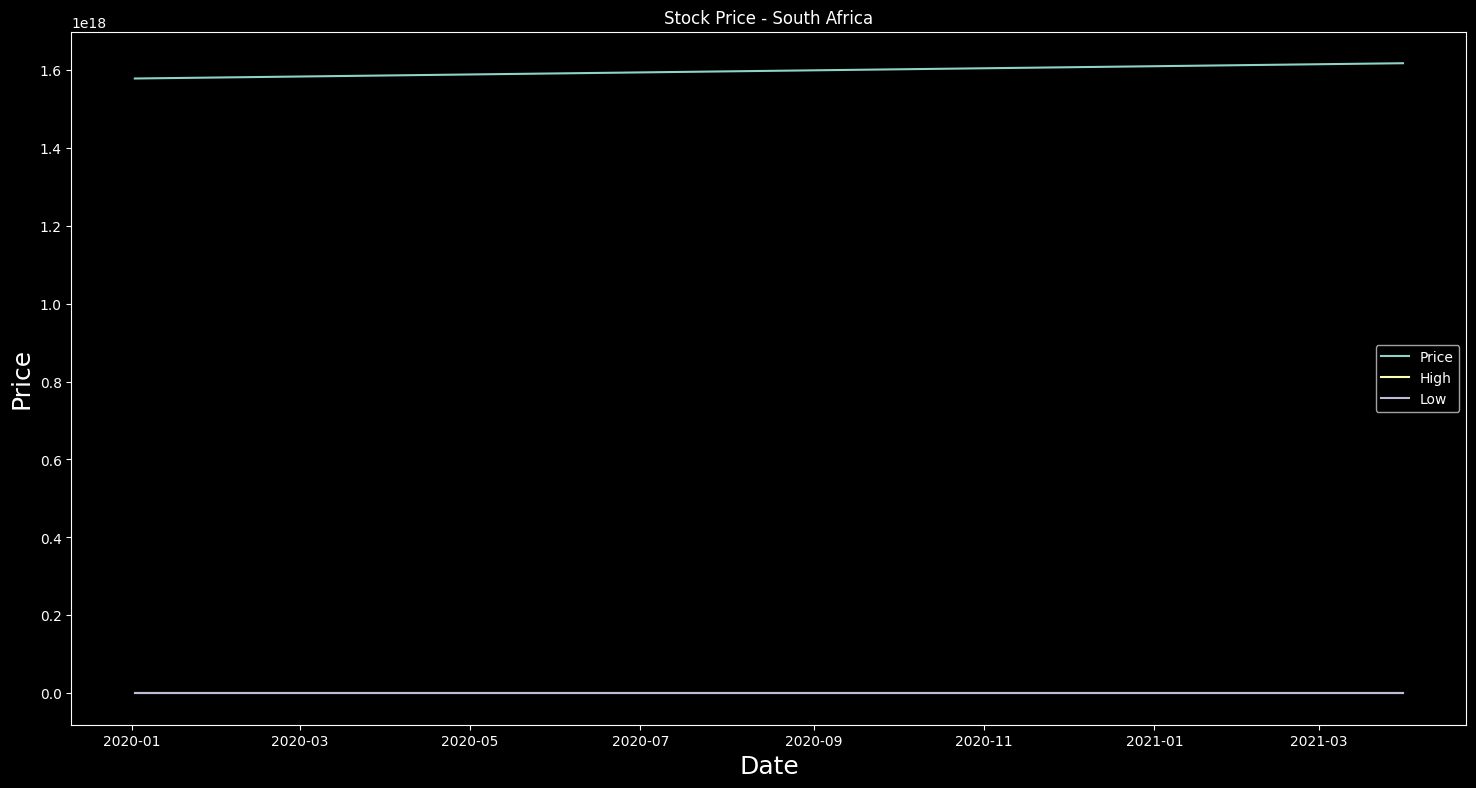

In [35]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(safrica['Date'], safrica['Price'], label='Price')
plt.plot(safrica['Date'], safrica['High'], label='High')
plt.plot(safrica['Date'], safrica['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - South Africa')

# Show the legend
plt.legend()

# Display the plot
plt.show()

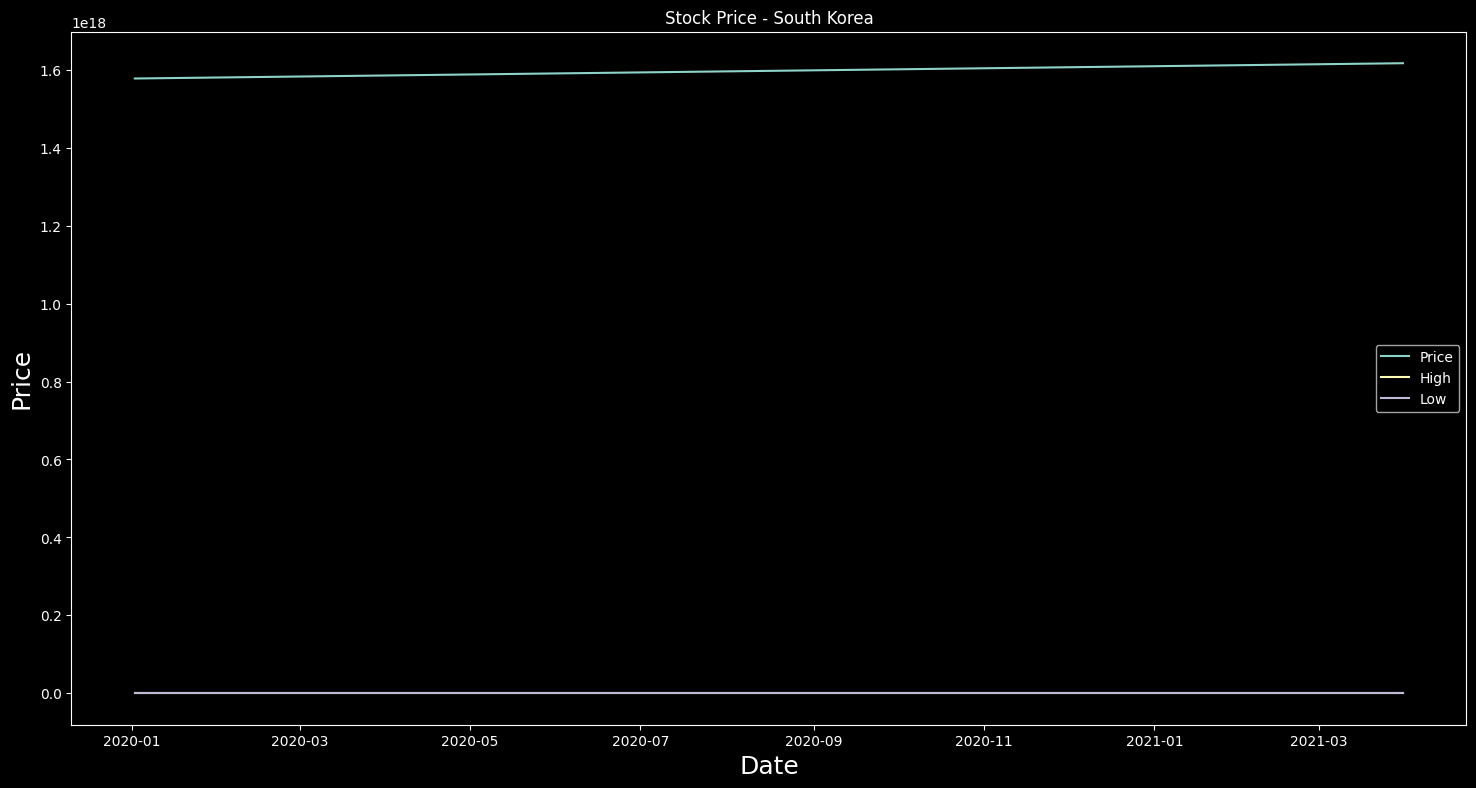

In [36]:
# Create the figure and plot the data
plt.figure(figsize=(18, 9))
plt.plot(skorea['Date'], skorea['Price'], label='Price')
plt.plot(skorea['Date'], skorea['High'], label='High')
plt.plot(skorea['Date'], skorea['Low'], label='Low')

# Label the axes and the plot
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Stock Price - South Korea')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [37]:
# Create 'Year' and 'Month' columns
russia['Year'] = russia['Date'].dt.year
russia['Month'] = russia['Date'].dt.month
russia.head()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Month
0,2020-01-03,255.00,255.99,258.19,253.7,35.85M,0.0010,2020,1
1,2020-01-06,253.90,254.75,254.84,251.4,22.35M,-0.0043,2020,1
2,2020-01-08,259.15,253.57,259.15,253.03,40.82M,0.0207,2020,1
3,2020-01-09,257.99,259.4,261.76,257.01,38.33M,-0.0045,2020,1
4,2020-01-10,258.19,257.86,259.25,256.88,18.85M,0.0008,2020,1


In [38]:
# Create 'Year' and 'Month' columns
turkey['Year'] = turkey['Date'].dt.year
turkey['Month'] = turkey['Date'].dt.month

In [39]:
# Create 'Year' and 'Month' columns
egypt['Year'] = egypt['Date'].dt.year
egypt['Month'] = egypt['Date'].dt.month

In [40]:
# Create 'Year' and 'Month' columns
brazil['Year'] = brazil['Date'].dt.year
brazil['Month'] = brazil['Date'].dt.month

In [41]:
# Create 'Year' and 'Month' columns
argentina['Year'] = argentina['Date'].dt.year
argentina['Month'] = argentina['Date'].dt.month

In [42]:
# Create 'Year' and 'Month' columns
colombia['Year'] = colombia['Date'].dt.year
colombia['Month'] = colombia['Date'].dt.month

In [43]:
# Create 'Year' and 'Month' columns
safrica['Year'] = safrica['Date'].dt.year
safrica['Month'] = safrica['Date'].dt.month

In [44]:
# Create 'Year' and 'Month' columns
skorea['Year'] = skorea['Date'].dt.year
skorea['Month'] = skorea['Date'].dt.month

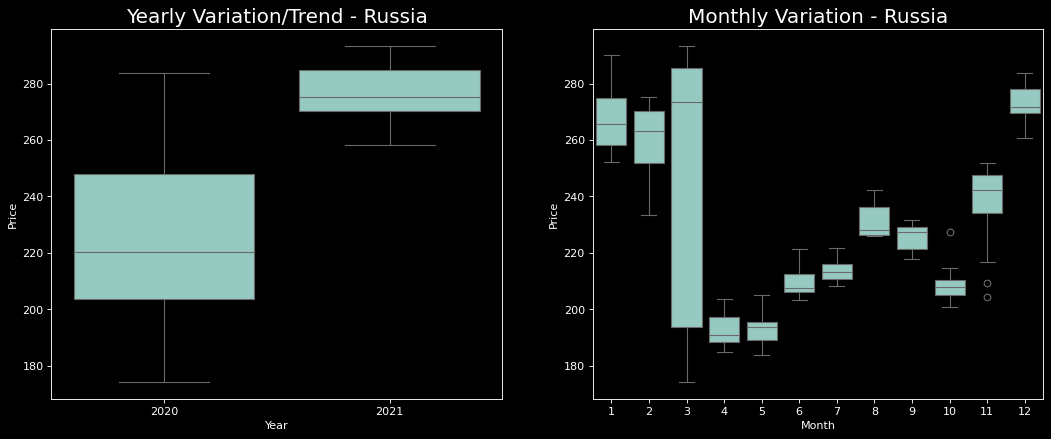

In [45]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=russia, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=russia)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Russia', fontsize=18); 
axes[1].set_title('Monthly Variation - Russia', fontsize=18)
plt.show()

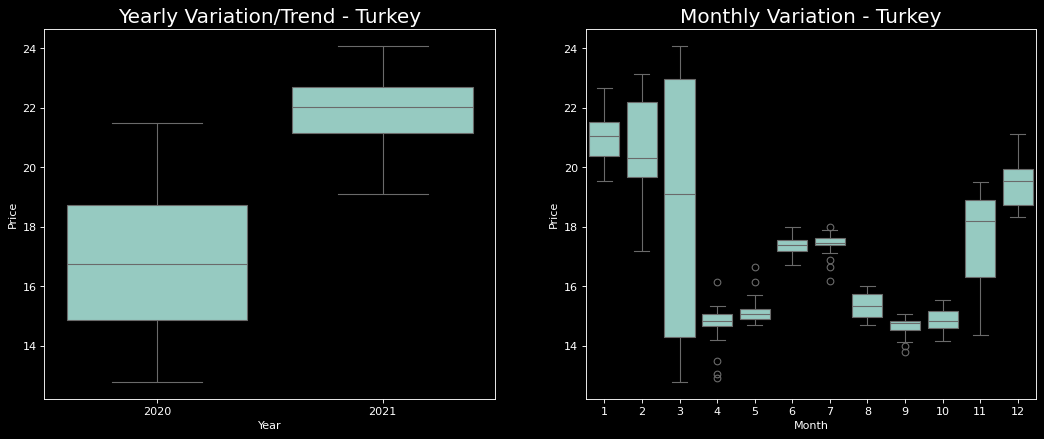

In [46]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=turkey, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=turkey)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Turkey', fontsize=18); 
axes[1].set_title('Monthly Variation - Turkey', fontsize=18)
plt.show()

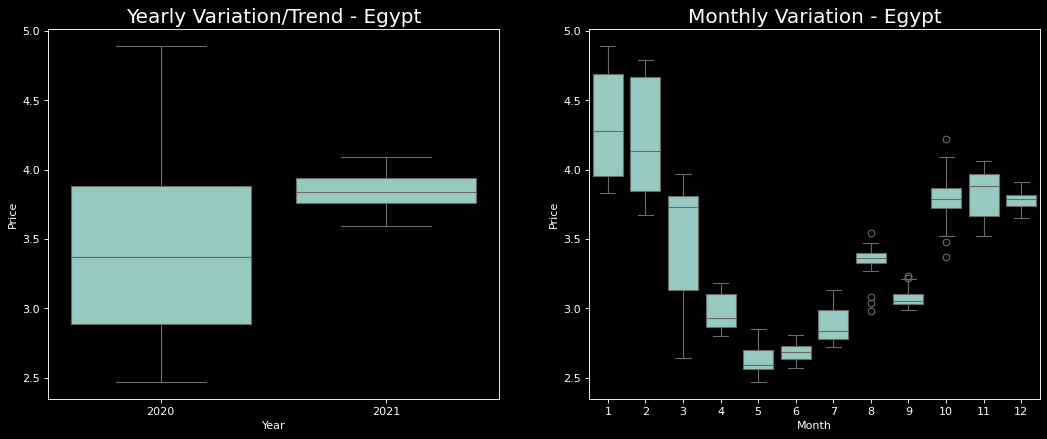

In [47]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=egypt, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=egypt)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Egypt', fontsize=18); 
axes[1].set_title('Monthly Variation - Egypt', fontsize=18)
plt.show()

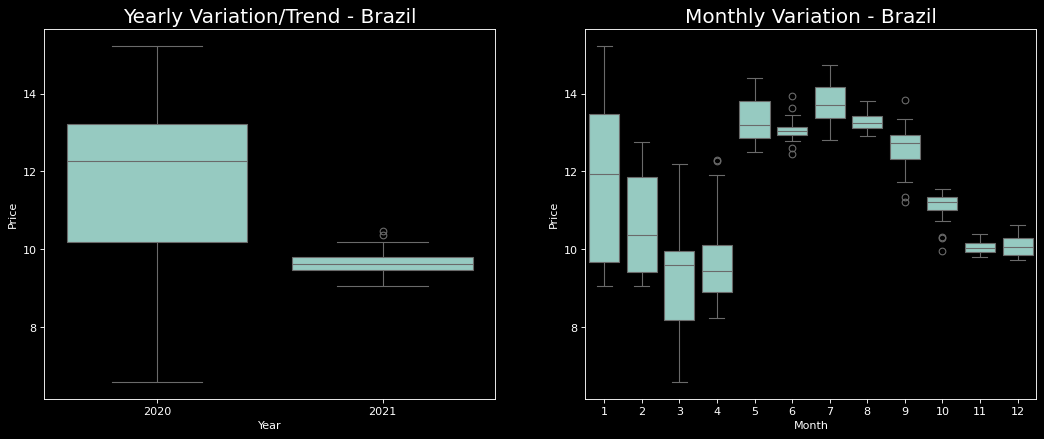

In [48]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=brazil, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=brazil)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Brazil', fontsize=18); 
axes[1].set_title('Monthly Variation - Brazil', fontsize=18)
plt.show()

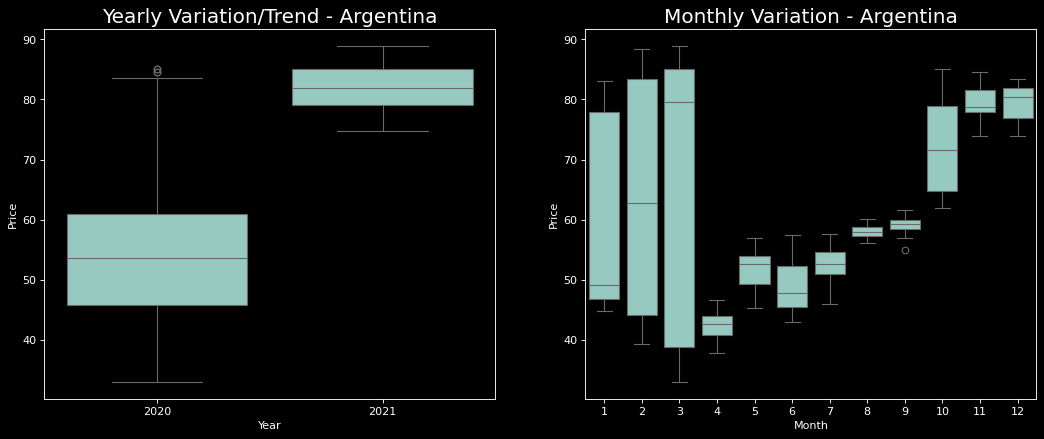

In [49]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=argentina, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=argentina)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Argentina', fontsize=18); 
axes[1].set_title('Monthly Variation - Argentina', fontsize=18)
plt.show()

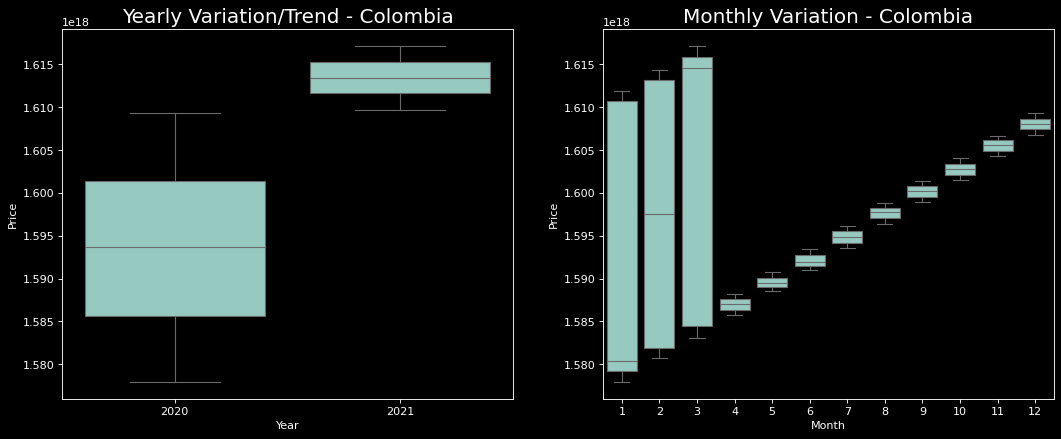

In [50]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=colombia, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=colombia)

# Set Title
axes[0].set_title('Yearly Variation/Trend - Colombia', fontsize=18); 
axes[1].set_title('Monthly Variation - Colombia', fontsize=18)
plt.show()

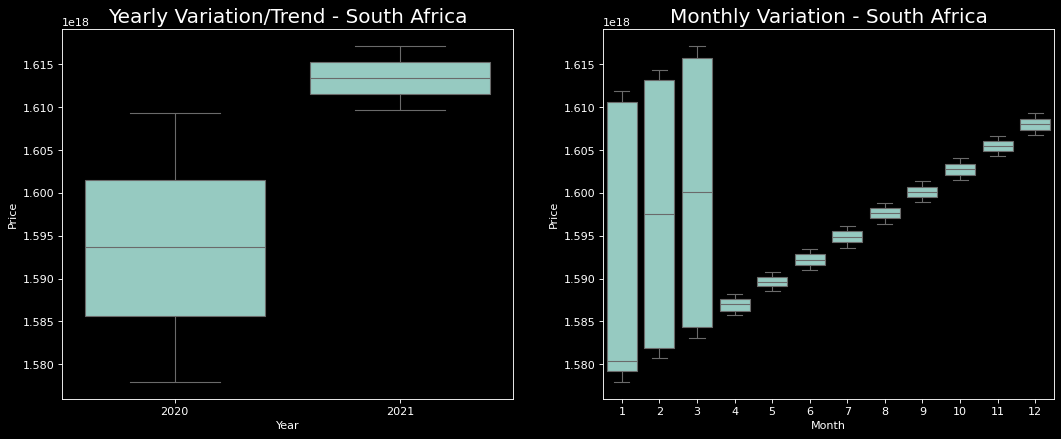

In [51]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=safrica, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=safrica)

# Set Title
axes[0].set_title('Yearly Variation/Trend - South Africa', fontsize=18); 
axes[1].set_title('Monthly Variation - South Africa', fontsize=18)
plt.show()

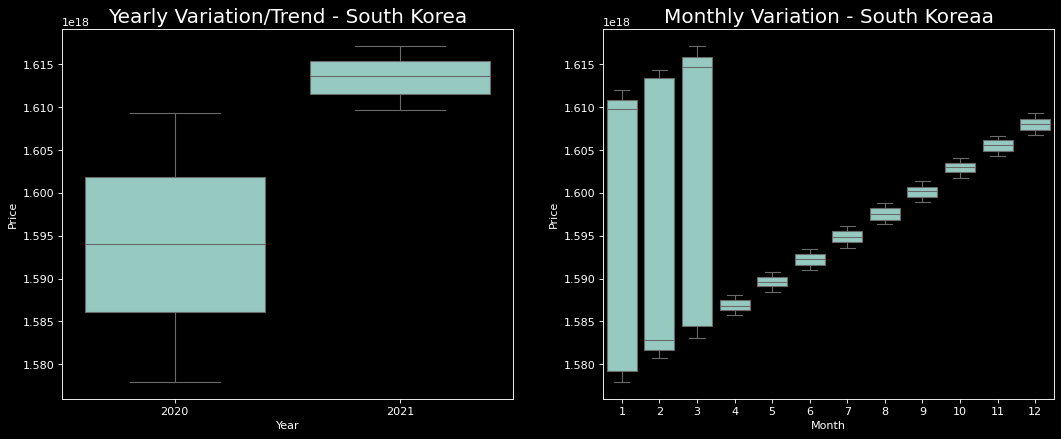

In [52]:
# Draw year_wise and month_wise box plots
fig, axes = plt.subplots(1, 2, figsize=(16,6), dpi= 80)
sns.boxplot(x='Year', y='Price', data=skorea, ax=axes[0])
sns.boxplot(x='Month', y='Price', data=skorea)

# Set Title
axes[0].set_title('Yearly Variation/Trend - South Korea', fontsize=18); 
axes[1].set_title('Monthly Variation - South Koreaa', fontsize=18)
plt.show()

In [53]:
#Splitting the data into training and testing. Training data is 2020 and Testing data is 2021.
# Split the data
train_russia = russia[russia['Year'] == 2020]
test_russia = russia[russia['Year'] == 2021]

In [54]:
# Create DataFrame
train_russia = pd.DataFrame(train_russia)
test_russia = pd.DataFrame(test_russia)

# Select columns to normalize
columns_to_normalize = ['Price']
# #Normalize the data, Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both train and test data
train_russia[columns_to_normalize] = scaler.fit_transform(train_russia[columns_to_normalize])
test_russia[columns_to_normalize] = scaler.transform(test_russia[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_russia = train_russia[['Date', 'Price']]
test_russia = test_russia[['Date', 'Price']]

# Set 'Date' as the index
train_russia.set_index('Date', inplace=True)
test_russia.set_index('Date', inplace=True)

# Display the normalized data
print("Normalized Training Data:")
print(train_russia.head())

print("\nNormalized Testing Data:")
print(test_russia.head())


Normalized Training Data:
               Price
Date                
2020-01-03  0.737530
2020-01-06  0.727480
2020-01-08  0.775443
2020-01-09  0.764846
2020-01-10  0.766673

Normalized Testing Data:
               Price
Date                
2021-01-04  0.892838
2021-01-05  0.922072
2021-01-06  0.901334
2021-01-08  0.999178
2021-01-11  1.052622


#### Data Modeling

#### ARIMA, SARIMA, fbprophet, Keras LSTM

In [55]:
#Autoregressive Moving Average (ARMA)
#The Autoregressive Moving Average (ARMA) method model predicts the next step in 
#the sequence based on a linear combination of both past observations and past residual errors. 
#The method combines both Autoregression (AR) and Moving Average (MA) models.
#To represent the model, the notation involves specifying the order for the AR(p) and MA(q) models 
#as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.
#The method is suitable for univariate time series without trend and seasonal components.

#We will use Auto ARIMA

#Test for stationarity
adf_test_russia = ADFTest(alpha=0.05)
adf_test_russia.should_diff(train_russia)

#Since p-value is greater than 0.05, it indicates that the time series in non-stationary.
#In other words, it has some time-dependent structure and does not have constant variance over time.


(0.6600743736628866, True)

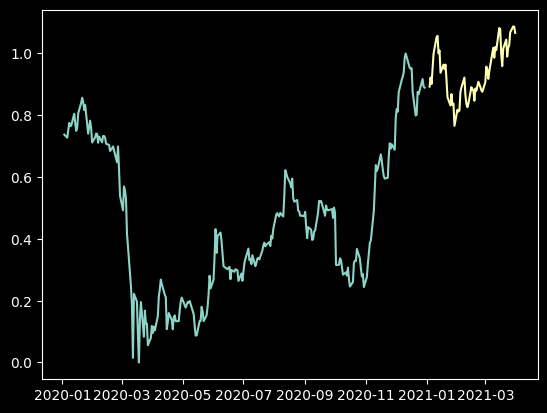

In [56]:
plt.plot(train_russia)
plt.plot(test_russia)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-835.343, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-838.750, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-837.161, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-837.208, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-840.704, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.411 seconds


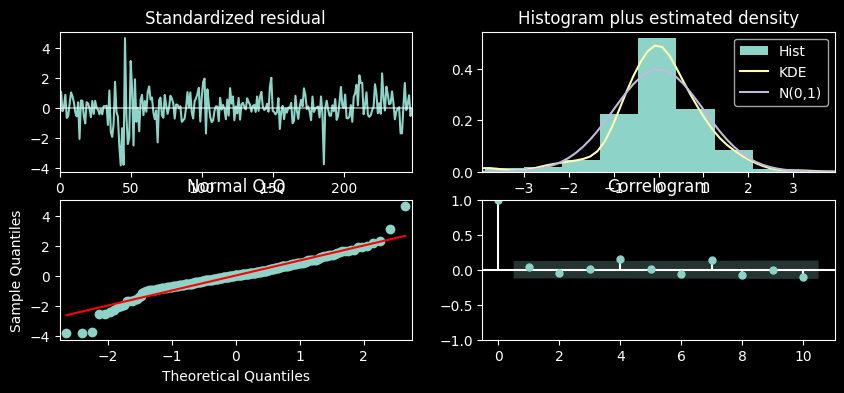

In [57]:
arima_russia = auto_arima(train_russia['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_russia.plot_diagnostics(figsize=(10,4))
plt.show()

In [58]:
#Train the Best Arima Model
arima_russia = ARIMA(train_russia['Price'], order=(0,1,0))
arima_russia = arima_russia.fit()  
arima_russia.summary()


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  250
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 421.352
Date:                Thu, 30 May 2024   AIC                           -840.704
Time:                        15:58:32   BIC                           -837.186
Sample:                             0   HQIC                          -839.288
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0020      0.000     18.774      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               142.35
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


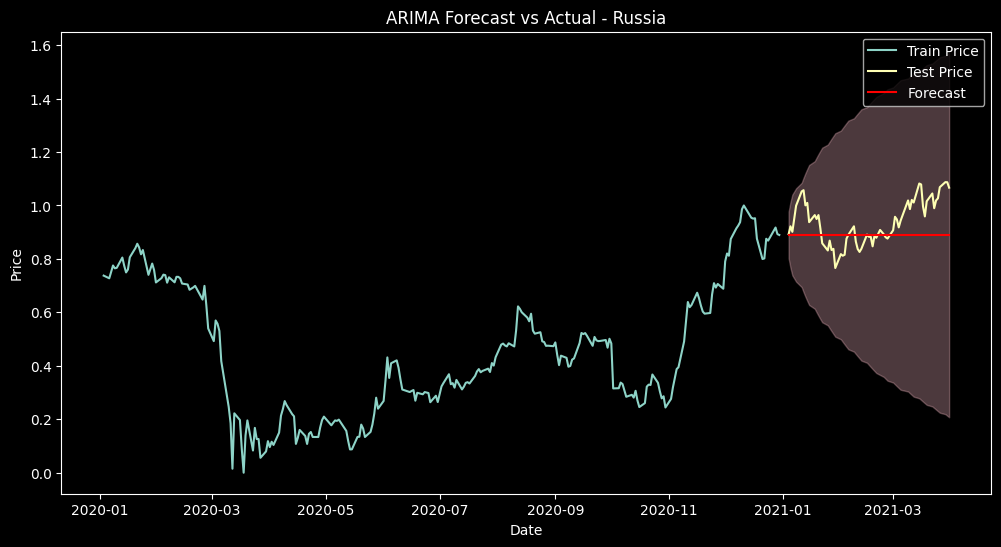

In [59]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_russia)
forecast = arima_russia.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_russia['Forecast'] = None
test_russia['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_russia.index, train_russia['Price'], label='Train Price')
plt.plot(test_russia.index, test_russia['Price'], label='Test Price')
plt.plot(test_russia.index, test_russia['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_russia.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Russia')
plt.legend()
plt.show()


In [60]:
train_turkey = turkey[turkey['Year'] == 2020]
test_turkey = turkey[turkey['Year'] == 2021]
train_turkey = pd.DataFrame(train_turkey)
test_turkey = pd.DataFrame(test_turkey)

train_turkey[columns_to_normalize] = scaler.fit_transform(train_turkey[columns_to_normalize])
test_turkey[columns_to_normalize] = scaler.transform(test_turkey[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_turkey = train_turkey[['Date', 'Price']]
test_turkey = test_turkey[['Date', 'Price']]

# Set 'Date' as the index
train_turkey.set_index('Date', inplace=True)
test_turkey.set_index('Date', inplace=True)

In [61]:
adf_test_turkey = ADFTest(alpha=0.05)
adf_test_turkey.should_diff(train_turkey)

(0.8201519262444074, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-828.571, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-831.616, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-830.282, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-830.327, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-833.602, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.334 seconds


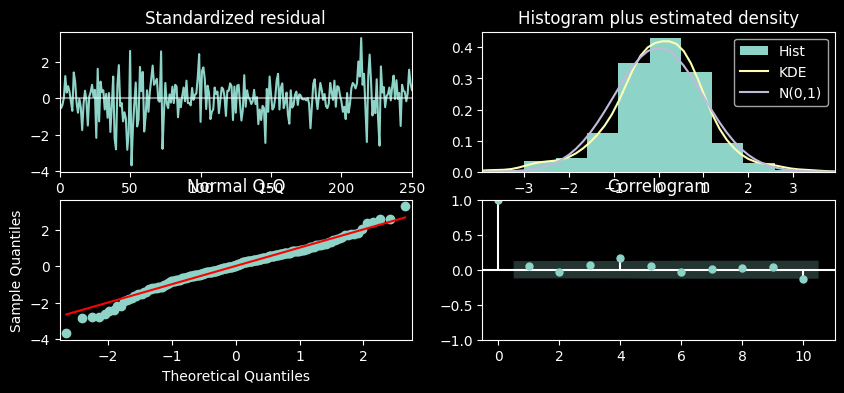

In [62]:
arima_turkey = auto_arima(train_turkey['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_turkey.plot_diagnostics(figsize=(10,4))
plt.show()


In [63]:
#Train the Best Arima Model
arima_turkey = ARIMA(train_turkey['Price'], order=(0,1,0))
arima_turkey = arima_turkey.fit()  
arima_turkey.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  252
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 417.801
Date:                Thu, 30 May 2024   AIC                           -833.602
Time:                        15:58:33   BIC                           -830.076
Sample:                             0   HQIC                          -832.183
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0021      0.000     14.189      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                20.09
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


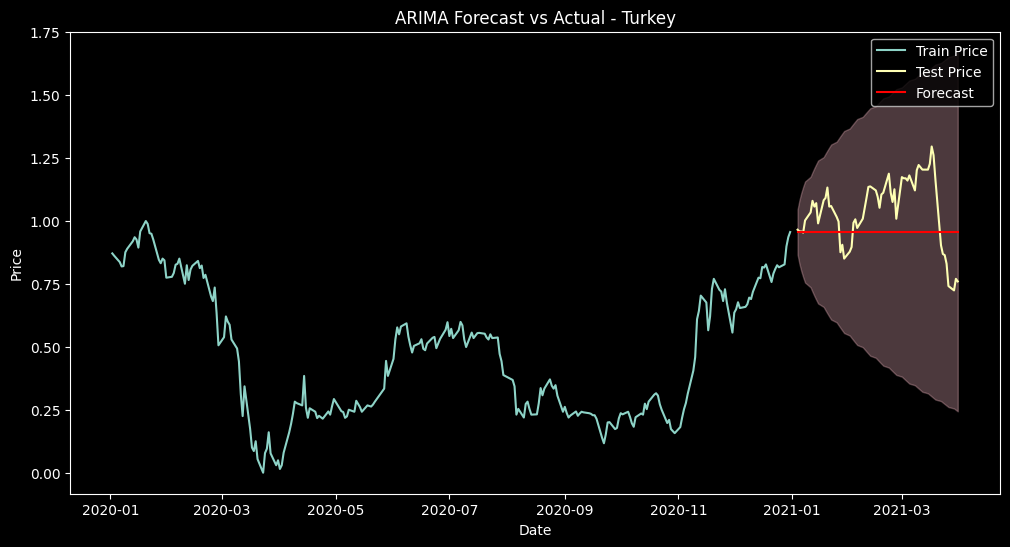

In [64]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_turkey)
forecast = arima_turkey.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_turkey['Forecast'] = None
test_turkey['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_turkey.index, train_turkey['Price'], label='Train Price')
plt.plot(test_turkey.index, test_turkey['Price'], label='Test Price')
plt.plot(test_turkey.index, test_turkey['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_turkey.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Turkey')
plt.legend()
plt.show()

In [65]:
train_egypt = egypt[egypt['Year'] == 2020]
test_egypt = egypt[egypt['Year'] == 2021]
train_egypt = pd.DataFrame(train_egypt)
test_egypt = pd.DataFrame(test_egypt)

train_egypt[columns_to_normalize] = scaler.fit_transform(train_egypt[columns_to_normalize])
test_egypt[columns_to_normalize] = scaler.transform(test_egypt[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_egypt = train_egypt[['Date', 'Price']]
test_egypt = test_egypt[['Date', 'Price']]

# Set 'Date' as the index
train_egypt.set_index('Date', inplace=True)
test_egypt.set_index('Date', inplace=True)

In [66]:
adf_test_egypt = ADFTest(alpha=0.05)
adf_test_egypt.should_diff(train_egypt)

(0.6059935544302878, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-899.090, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-888.178, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-901.089, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-899.966, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-889.707, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-899.090, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-897.097, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-902.729, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-900.731, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-900.731, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-901.578, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-898.739, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.990 seconds


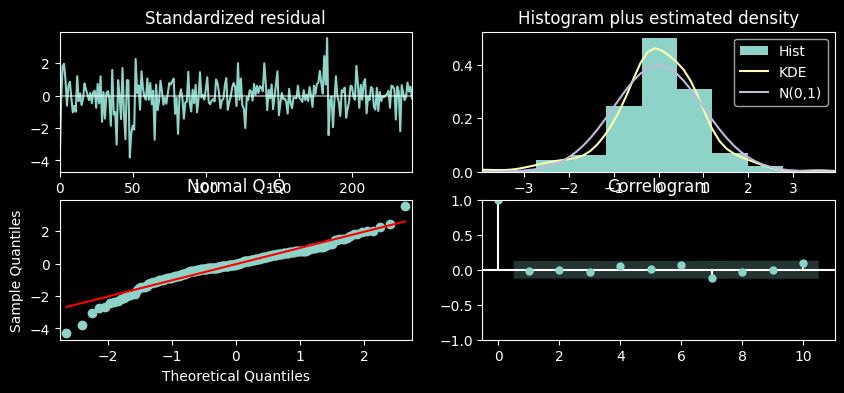

In [67]:
arima_egypt = auto_arima(train_egypt['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_egypt.plot_diagnostics(figsize=(10,4))
plt.show()

In [68]:
#Train the Best Arima Model
arima_egypt = ARIMA(train_egypt['Price'], order=(1,1,0))
arima_egypt = arima_egypt.fit()  
arima_egypt.summary()


c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  243
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 453.364
Date:                Thu, 30 May 2024   AIC                           -902.729
Time:                        15:58:35   BIC                           -895.751
Sample:                             0   HQIC                          -899.918
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2547      0.047      5.435      0.000       0.163       0.347
sigma2         0.0014   8.41e-05     16.415      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                78.41
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


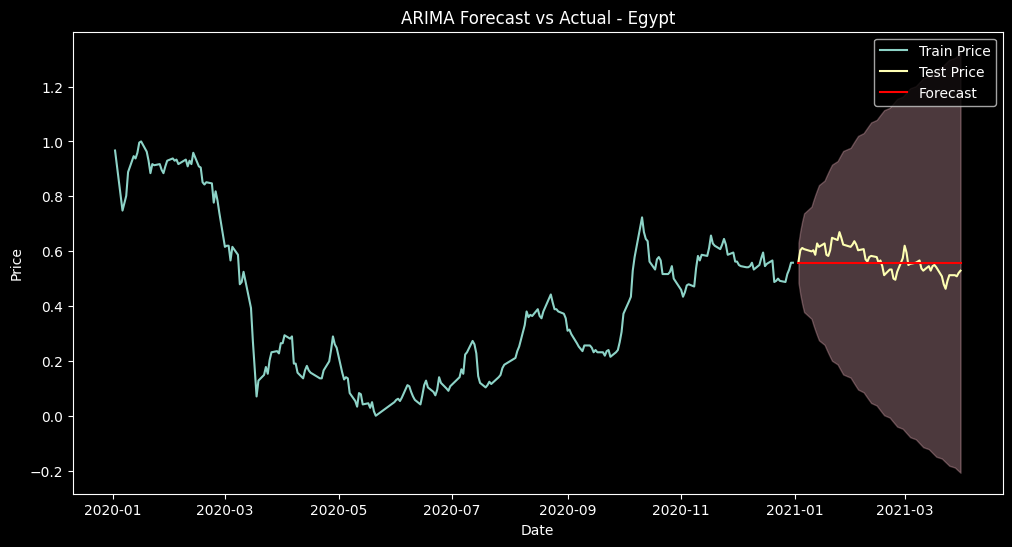

In [69]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_egypt)
forecast = arima_egypt.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_egypt['Forecast'] = None
test_egypt['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_egypt.index, train_egypt['Price'], label='Train Price')
plt.plot(test_egypt.index, test_egypt['Price'], label='Test Price')
plt.plot(test_egypt.index, test_egypt['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_egypt.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Egypt')
plt.legend()
plt.show()

In [70]:
train_brazil = brazil[brazil['Year'] == 2020]
test_brazil = brazil[brazil['Year'] == 2021]
train_brazil = pd.DataFrame(train_brazil)
test_brazil = pd.DataFrame(test_brazil)

train_brazil[columns_to_normalize] = scaler.fit_transform(train_brazil[columns_to_normalize])
test_brazil[columns_to_normalize] = scaler.transform(test_brazil[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_brazil = train_brazil[['Date', 'Price']]
test_brazil = test_brazil[['Date', 'Price']]

# Set 'Date' as the index
train_brazil.set_index('Date', inplace=True)
test_brazil.set_index('Date', inplace=True)


In [71]:
adf_test_brazil = ADFTest(alpha=0.05)
adf_test_brazil.should_diff(train_brazil)

(0.5576871288076071, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-795.315, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-798.696, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-798.606, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-798.241, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-800.561, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.319 seconds


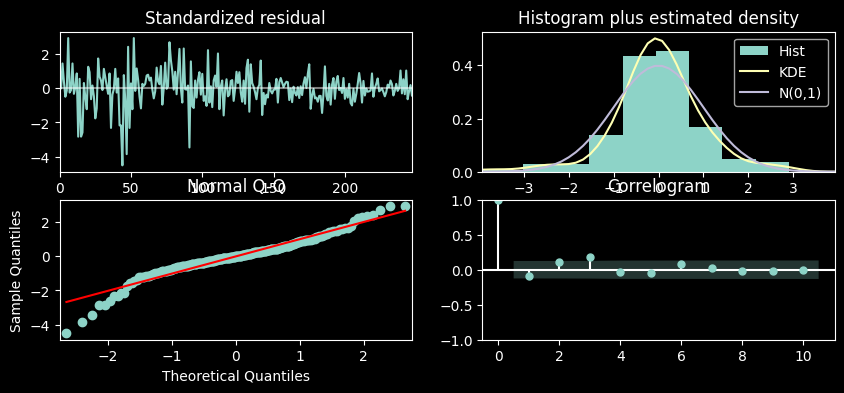

In [72]:
arima_brazil = auto_arima(train_brazil['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_brazil.plot_diagnostics(figsize=(10,4))
plt.show()

In [73]:
#Train the Best Arima Model
arima_brazil = ARIMA(train_brazil['Price'], order=(0,1,0))
arima_brazil = arima_brazil.fit()  
arima_brazil.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  249
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 401.280
Date:                Thu, 30 May 2024   AIC                           -800.561
Time:                        15:58:36   BIC                           -797.047
Sample:                             0   HQIC                          -799.146
                                - 249                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0023      0.000     17.784      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   1.93   Jarque-Bera (JB):               109.48
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


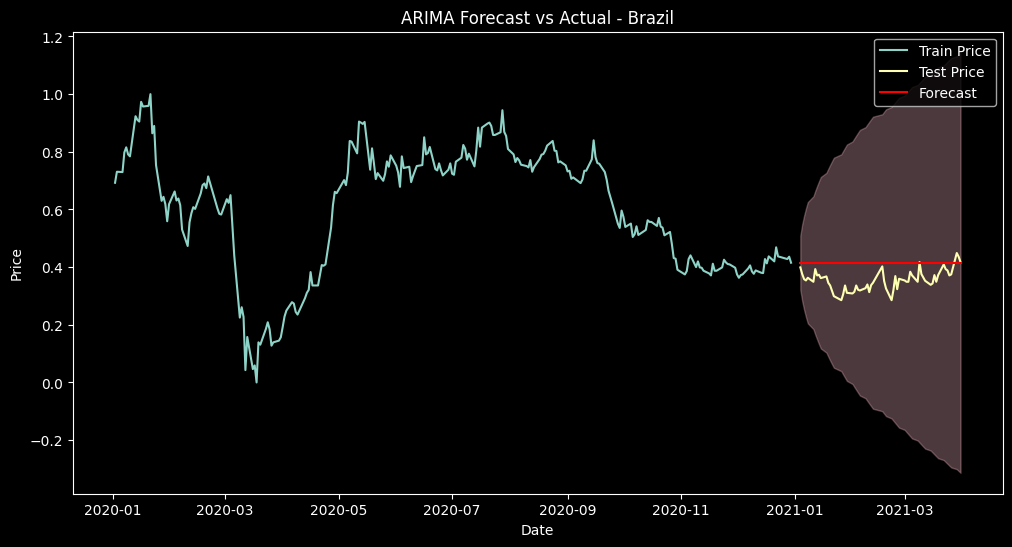

In [74]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_brazil)
forecast = arima_brazil.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_brazil['Forecast'] = None
test_brazil['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_brazil.index, train_brazil['Price'], label='Train Price')
plt.plot(test_brazil.index, test_brazil['Price'], label='Test Price')
plt.plot(test_brazil.index, test_brazil['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_brazil.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Brazil')
plt.legend()
plt.show()

In [75]:
train_argentina = argentina[argentina['Year'] == 2020]
test_argentina = argentina[argentina['Year'] == 2021]
train_argentina = pd.DataFrame(train_argentina)
test_argentina = pd.DataFrame(test_argentina)

train_argentina[columns_to_normalize] = scaler.fit_transform(train_argentina[columns_to_normalize])
test_argentina[columns_to_normalize] = scaler.transform(test_argentina[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_argentina = train_argentina[['Date', 'Price']]
test_argentina = test_argentina[['Date', 'Price']]

# Set 'Date' as the index
train_argentina.set_index('Date', inplace=True)
test_argentina.set_index('Date', inplace=True)

In [76]:
adf_test_argentina = ADFTest(alpha=0.05)
adf_test_argentina.should_diff(train_argentina)

(0.2775974546074396, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-856.307, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-857.798, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-856.959, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-856.892, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-859.001, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.312 seconds


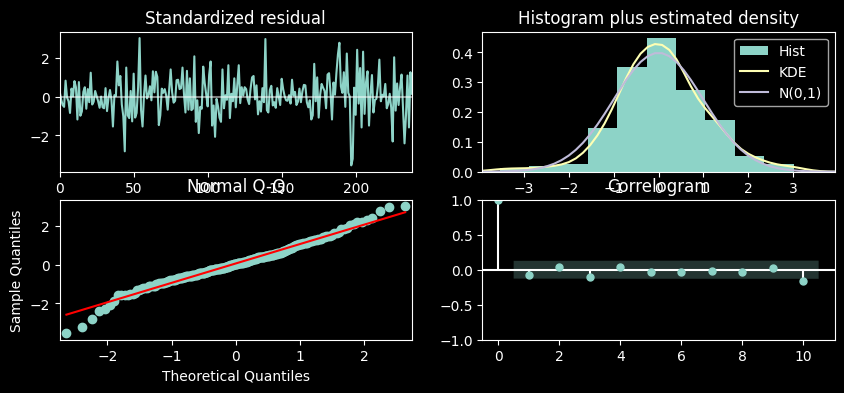

In [77]:
arima_argentina = auto_arima(train_argentina['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_argentina.plot_diagnostics(figsize=(10,4))
plt.show()

In [78]:
#Train the Best Arima Model
arima_argentina = ARIMA(train_argentina['Price'], order=(0,1,0))
arima_argentina = arima_argentina.fit()  
arima_argentina.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  240
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 430.501
Date:                Thu, 30 May 2024   AIC                           -859.001
Time:                        15:58:37   BIC                           -855.525
Sample:                             0   HQIC                          -857.600
                                - 240                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0016      0.000     13.651      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                12.92
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                            -0.04
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


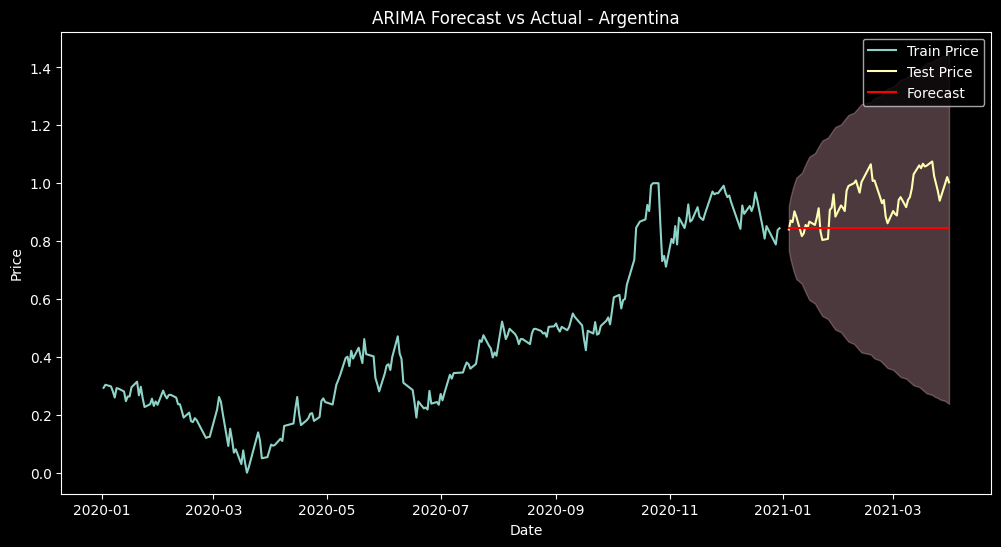

In [79]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_argentina)
forecast = arima_argentina.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_argentina['Forecast'] = None
test_argentina['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_argentina.index, train_argentina['Price'], label='Train Price')
plt.plot(test_argentina.index, test_argentina['Price'], label='Test Price')
plt.plot(test_argentina.index, test_argentina['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_argentina.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Argentina')
plt.legend()
plt.show()

In [80]:
train_colombia = colombia[colombia['Year'] == 2020]
test_colombia = colombia[colombia['Year'] == 2021]
train_colombia = pd.DataFrame(train_colombia)
test_colombia = pd.DataFrame(test_colombia)

train_colombia[columns_to_normalize] = scaler.fit_transform(train_colombia[columns_to_normalize])
test_colombia[columns_to_normalize] = scaler.transform(test_colombia[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_colombia = train_colombia[['Date', 'Price']]
test_colombia = test_colombia[['Date', 'Price']]

# Set 'Date' as the index
train_colombia.set_index('Date', inplace=True)
test_colombia.set_index('Date', inplace=True)


In [81]:
adf_test_colombia = ADFTest(alpha=0.05)
adf_test_colombia.should_diff(train_colombia)

(0.23904037464148492, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2183.455, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2160.030, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2174.363, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2224.417, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1871.811, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2219.504, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2220.536, Time=0.48 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1926.734, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.361 seconds


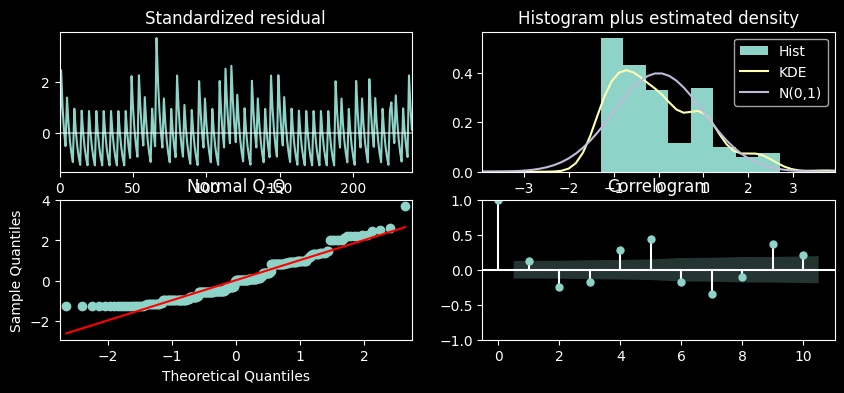

In [82]:
arima_colombia = auto_arima(train_colombia['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_colombia.plot_diagnostics(figsize=(10,4))
plt.show()

In [83]:
#Train the Best Arima Model
arima_colombia = ARIMA(train_colombia['Price'], order=(0,1,1))
arima_colombia = arima_colombia.fit()  
arima_colombia.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  242
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 965.367
Date:                Thu, 30 May 2024   AIC                          -1926.734
Time:                        15:58:39   BIC                          -1919.764
Sample:                             0   HQIC                         -1923.926
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2790      0.188      1.481      0.139      -0.090       0.648
sigma2      1.939e-05   1.95e-06      9.951      0.000    1.56e-05    2.32e-05
===================================================================================
Ljung-Box (L1) (Q):                  47.96   Jarque-Bera (JB):                68.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             1.28
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


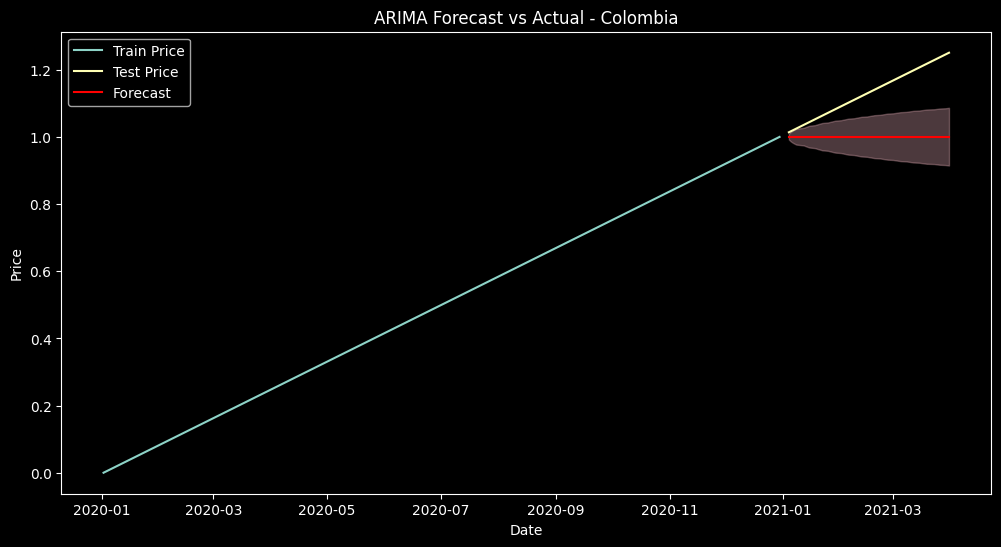

In [84]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_colombia)
forecast = arima_colombia.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_colombia['Forecast'] = None
test_colombia['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_colombia.index, train_colombia['Price'], label='Train Price')
plt.plot(test_colombia.index, test_colombia['Price'], label='Test Price')
plt.plot(test_colombia.index, test_colombia['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_colombia.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Colombia')
plt.legend()
plt.show()


In [85]:
train_safrica = safrica[safrica['Year'] == 2020]
test_safrica = safrica[safrica['Year'] == 2021]
train_safrica = pd.DataFrame(train_safrica)
test_safrica = pd.DataFrame(test_safrica)

train_safrica[columns_to_normalize] = scaler.fit_transform(train_safrica[columns_to_normalize])
test_safrica[columns_to_normalize] = scaler.transform(test_safrica[columns_to_normalize])


# Keep only the 'Date' and 'Price' columns
train_safrica = train_safrica[['Date', 'Price']]
test_safrica = test_safrica[['Date', 'Price']]

# Set 'Date' as the index
train_safrica.set_index('Date', inplace=True)
test_safrica.set_index('Date', inplace=True)

In [86]:
adf_test_safrica = ADFTest(alpha=0.05)
adf_test_safrica.should_diff(train_safrica)

(0.47113725829431563, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2307.143, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2311.155, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2324.667, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2370.882, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1981.560, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2377.669, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2377.988, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2303.124, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2372.077, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2372.516, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2305.147, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2399.659, Time=0.66 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-2407.148, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2226.738, Time=0.65 sec
 ARIMA(4,1,3)(0,0,0

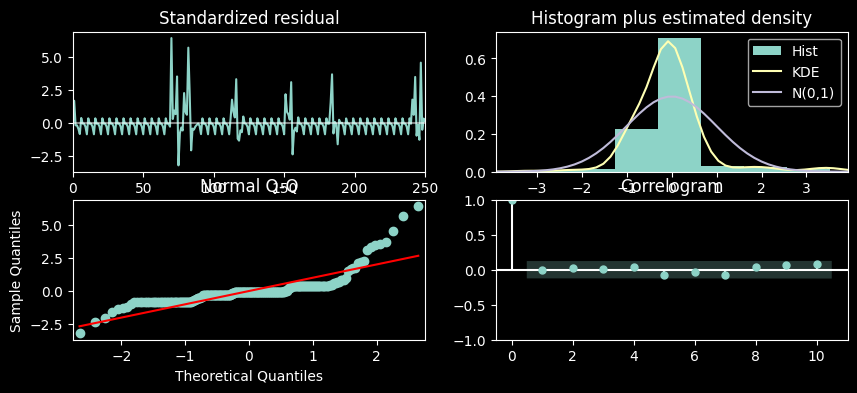

In [87]:
arima_safrica = auto_arima(train_safrica['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_safrica.plot_diagnostics(figsize=(10,4))
plt.show()

In [88]:
#Train the Best Arima Model
arima_safrica = ARIMA(train_safrica['Price'], order=(5,1,3))
arima_safrica = arima_safrica.fit()  
arima_safrica.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  252
Model:                 ARIMA(5, 1, 3)   Log Likelihood                1256.937
Date:                Thu, 30 May 2024   AIC                          -2495.875
Time:                        15:58:47   BIC                          -2464.146
Sample:                             0   HQIC                         -2483.106
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0241      0.091      0.266      0.790      -0.154       0.202
ar.L2         -0.0302      0.104     -0.291      0.771      -0.234       0.174
ar.L3          0.0848      0.067      1.272      0.203      -0.046       0.215
ar.L4          0.1653      0.035      4.763      0.000       0.097       0.233
ar.L5          0.7553      0.044     17.350      0.000       0.670       0.841
ma.L1         -0.3974      0.085     -4.649      0.000      -0.565      -0.230
ma.L2         -0.0259      0.123     -0.211      0.833      -0.266       0.214
ma.L3         -0.1123      0.100     -1.120      0.263      -0.309       0.084
sigma2      2.519e-06   1.57e-07     16.032      0.000    2.21e-06    2.83e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              1383.36
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.64
Prob(H) (two-sided):                  0.02   Kurtosis:                        14.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


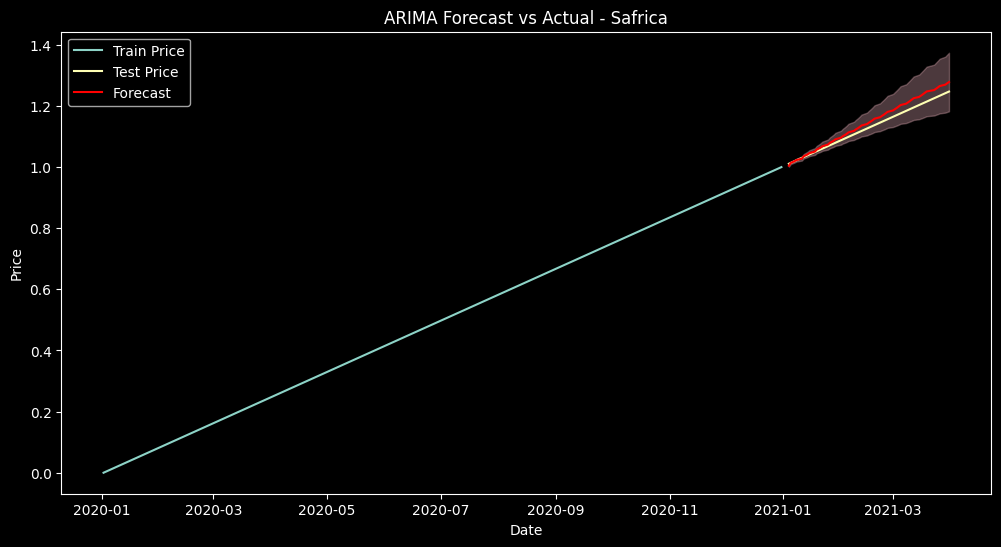

In [89]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_safrica)
forecast = arima_safrica.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_safrica['Forecast'] = None
test_safrica['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_safrica.index, train_safrica['Price'], label='Train Price')
plt.plot(test_safrica.index, test_safrica['Price'], label='Test Price')
plt.plot(test_safrica.index, test_safrica['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_safrica.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Safrica')
plt.legend()
plt.show()

In [90]:
train_skorea = skorea[skorea['Year'] == 2020]
test_skorea = skorea[skorea['Year'] == 2021]
train_skorea = pd.DataFrame(train_skorea)
test_skorea = pd.DataFrame(test_skorea)

train_skorea[columns_to_normalize] = scaler.fit_transform(train_skorea[columns_to_normalize])
test_skorea[columns_to_normalize] = scaler.transform(test_skorea[columns_to_normalize])

# Keep only the 'Date' and 'Price' columns
train_skorea = train_skorea[['Date', 'Price']]
test_skorea = test_skorea[['Date', 'Price']]

# Set 'Date' as the index
train_skorea.set_index('Date', inplace=True)
test_skorea.set_index('Date', inplace=True)

In [91]:
adf_test_skorea = ADFTest(alpha=0.05)
adf_test_skorea.should_diff(train_skorea)

(0.1991393500662773, True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2592.550, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2573.514, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2582.842, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2589.796, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2190.394, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2581.880, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2590.551, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2593.234, Time=0.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2589.673, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2589.914, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2342.757, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.830 seconds


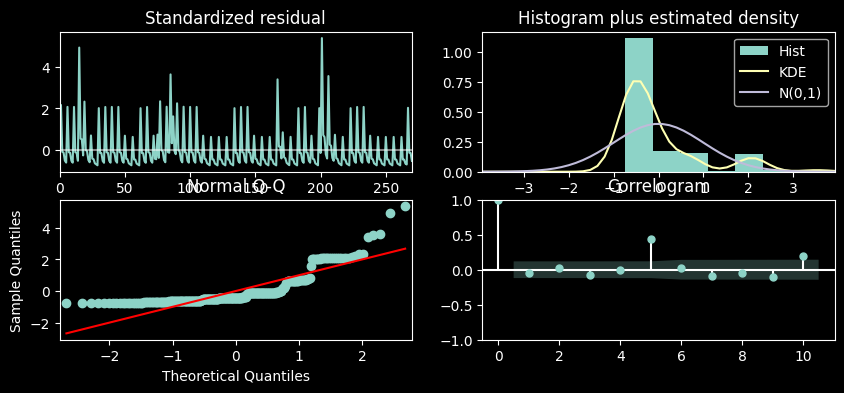

In [92]:
arima_skorea = auto_arima(train_skorea['Price'],          
                      start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
arima_skorea.plot_diagnostics(figsize=(10,4))
plt.show()

In [93]:
#Train the Best Arima Model
arima_skorea = ARIMA(train_skorea['Price'], order=(0,1,2))
arima_skorea = arima_skorea.fit()  
arima_skorea.summary()

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  272
Model:                 ARIMA(0, 1, 2)   Log Likelihood                1174.378
Date:                Thu, 30 May 2024   AIC                          -2342.757
Time:                        15:58:50   BIC                          -2331.950
Sample:                             0   HQIC                         -2338.418
                                - 272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4969      0.083      6.022      0.000       0.335       0.659
ma.L2          0.3836      0.062      6.179      0.000       0.262       0.505
sigma2      1.003e-05   6.72e-07     14.926      0.000    8.72e-06    1.14e-05
===================================================================================
Ljung-Box (L1) (Q):                  54.94   Jarque-Bera (JB):               118.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             1.22
Prob(H) (two-sided):                  0.25   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\dansh\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


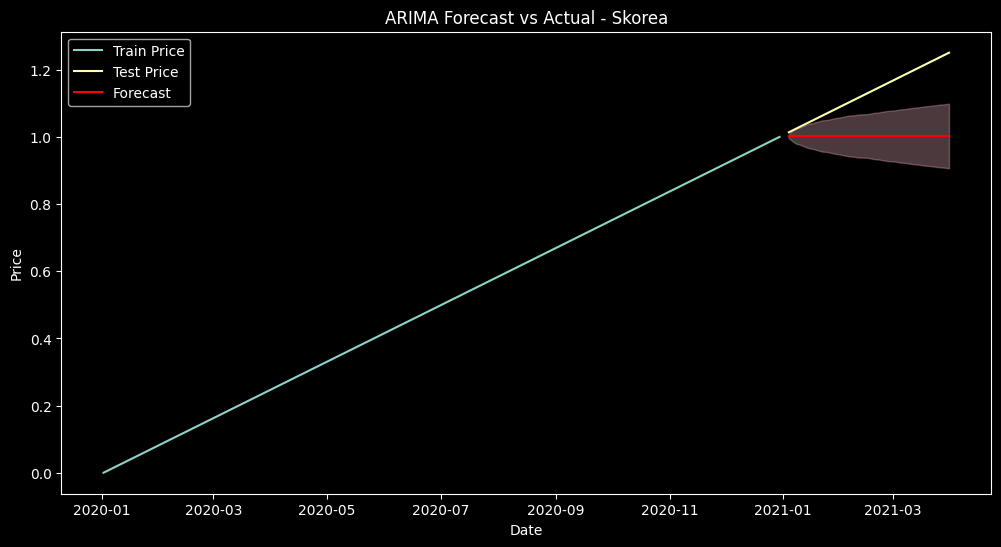

In [94]:
# Forecast the future values (for the length of the test set)
forecast_steps = len(test_skorea)
forecast = arima_skorea.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a combined dataframe for plotting
train_skorea['Forecast'] = None
test_skorea['Forecast'] = forecast_mean.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_skorea.index, train_skorea['Price'], label='Train Price')
plt.plot(test_skorea.index, test_skorea['Price'], label='Test Price')
plt.plot(test_skorea.index, test_skorea['Forecast'], label='Forecast', color='red')

# Plot the confidence intervals
plt.fill_between(test_skorea.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecast vs Actual - Skorea')
plt.legend()
plt.show()